In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [2]:
data= pd.read_csv('/home/ankit/Documents/sangeet/house_prices.csv')

In [3]:
data.head()


,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [4]:
print(data.describe())


            LotArea      SalePrice
count   1326.000000    1326.000000
mean    9076.268477  167433.042232
std     3119.870831   57192.320151
min     1300.000000   34900.000000
25%     7253.750000  128000.000000
50%     9127.500000  157000.000000
75%    10963.500000  200000.000000
max    17400.000000  326000.000000


In [5]:
co= data.corr()
co

,LotArea,SalePrice
LotArea,1.000000,0.390102
SalePrice,0.390102,1.000000


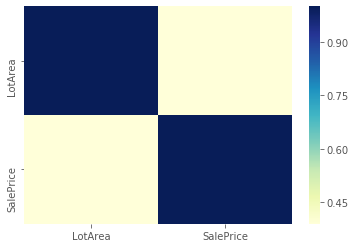

In [6]:
sns.heatmap(co,cmap="YlGnBu")

Text(0, 0.5, 'Price')

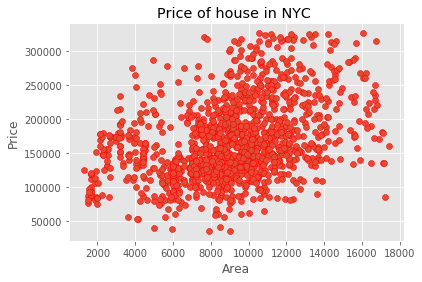

In [7]:
plt.scatter(data['LotArea'],data['SalePrice'],edgecolors='r')
plt.title('Price of house in NYC ')
plt.xlabel('Area')
plt.ylabel('Price')


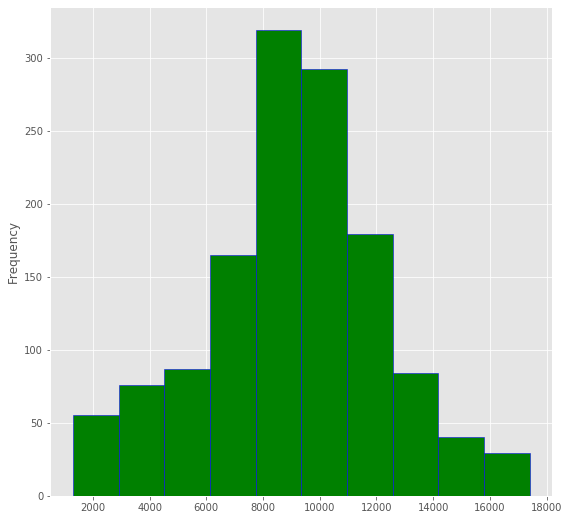

In [8]:
data.LotArea.plot(kind= 'hist', color= 'green',edgecolor= 'b', 
            figsize=(9,9))

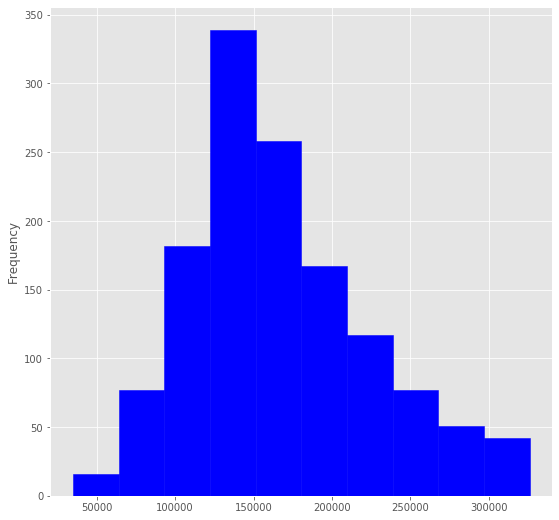

In [9]:
data.SalePrice.plot(kind= 'hist', color= 'b',edgecolor= 'b', 
            figsize=(9,9))

AxesSubplot(0.125,0.125;0.775x0.755)


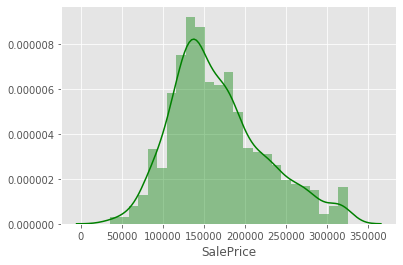

In [10]:
print(sns.distplot(data['SalePrice'], bins=25, color = 'green'))


AxesSubplot(0.125,0.125;0.775x0.755)


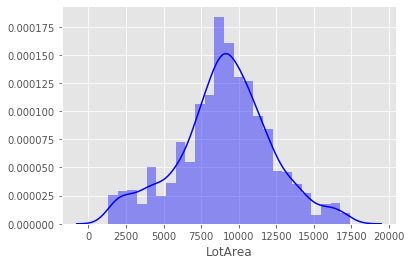

In [11]:
print(sns.distplot(data['LotArea'], bins=25, color = 'b'))


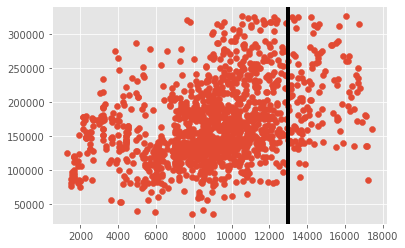

In [12]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=13000,linewidth= '4',color= 'black')

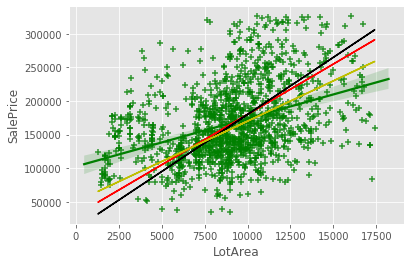

In [13]:

ax = sns.regplot(x= data.LotArea, y= data.SalePrice, marker="+",color= 'g',ci=100,x_jitter=.1)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")

plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")

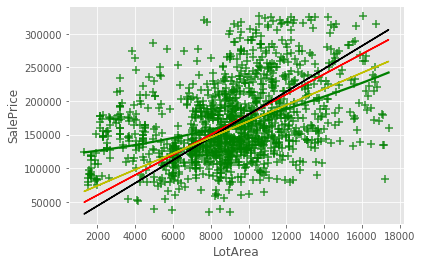

In [14]:
ax = sns.regplot(x= data.LotArea, y= data.SalePrice, marker="+",color= 'g',x_jitter=.1,scatter_kws={"s": 80},order=2, ci=None, truncate=True)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")

plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")

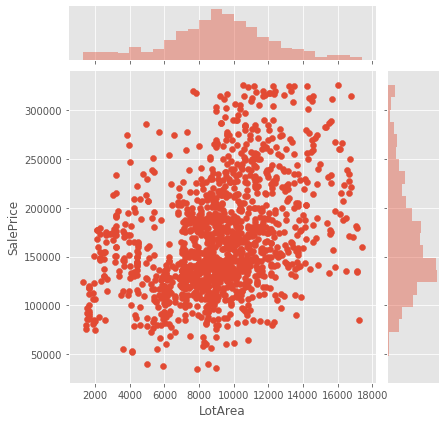

In [15]:
sns.jointplot(x=data.LotArea, y=data.SalePrice,data = data)

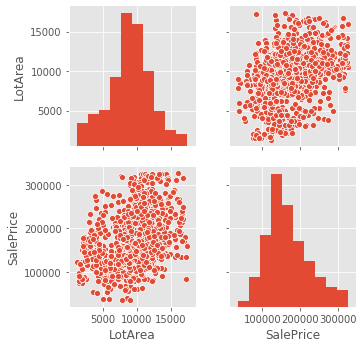

In [16]:
sns.pairplot(data)

### Create a linear model plot (using seaborn's lmplot) of Lot area vs Sales.

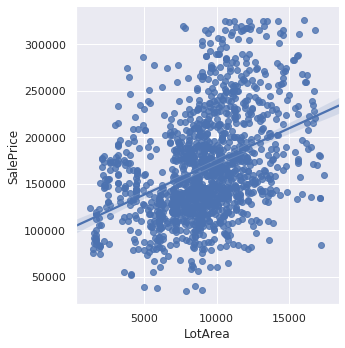

In [17]:
sns.set(color_codes= True)
sns.lmplot(x= 'LotArea', y= 'SalePrice',data= data)

### Training and Testing Data¶
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "lot area" column.

### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [18]:
from sklearn.model_selection import train_test_split

### Training the Model
Now its time to train our model on our training data!


In [19]:
x= data[['LotArea']]
print(x.head())


   LotArea
0     8450
1     9600
2    11250
3     9550
4    14260


In [20]:
y= data[['SalePrice']]
print(y.head())

   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


In [21]:
X = data.LotArea[:,np.newaxis]  # Reshape
y = data.SalePrice


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


In [23]:
lm = LinearRegression()


In [24]:
lm.fit(X_train, y_train )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(lm.coef_)


[6.6132829]


In [26]:
my_house = x.iloc[155]
my_house

LotArea    10106
Name: 155, dtype: int64

In [44]:
pred_my_house = regressor.predict(my_house.values.reshape(1, -1))
print("predicted value:", pred_my_house[0])


predicted value: 174796.85647178884


In [45]:
print("actual value:", y[155])


actual value: 127500


In [46]:
prices = pd.DataFrame({"actual": y,
          "predicted": y_pred})
prices.head(10)

,actual,predicted
0,208500,162954.472216
1,181500,171178.350171
2,223500,182977.827238
3,140000,170820.790260
4,250000,204502.933888
5,143000,203466.010145
6,307000,174639.530111
7,200000,176770.587181
8,129900,146292.180357
9,118000,155588.738046


In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y)

2771097635.5463276

In [27]:
predictions = lm.predict(X_test)


Text(0.5, 0, 'Y test')

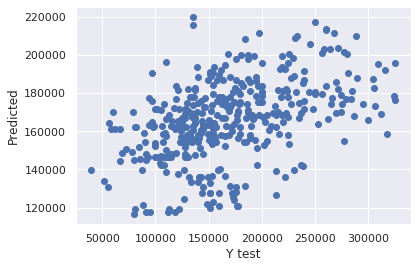

In [28]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')

### Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

    Calculate the Mean Absolute Error,
     Mean Squared Error, and
     the Root Mean Squared Error.

In [29]:
import sklearn.metrics as metrics

In [30]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))

MAE: 41197.71954587955


In [31]:
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))

MSE: 2672220271.581033


In [32]:
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

RMSE: 51693.52253020714


### Residuals¶
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

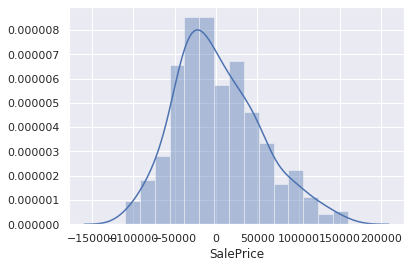

In [33]:
sns.distplot((y_test-predictions))

In [34]:
pd.DataFrame(lm.coef_ , x.columns, columns=['Coeffecient'])

,Coeffecient
LotArea,6.613283


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.19703892353647712

In [36]:
y_error = y_test - predictions
y_error.head()

1101     8195.312763
446    -36376.934387
501    -33796.577067
1286    45243.836990
497    -25023.500994
Name: SalePrice, dtype: float64

In [37]:
X = data.LotArea[:,np.newaxis]  # Reshape
y = data.SalePrice


In [38]:
# Fitting Simple Linear Regression to the Training set


regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(lm.coef_)


[6.6132829]


In [40]:
y_pred = regressor.predict(X)

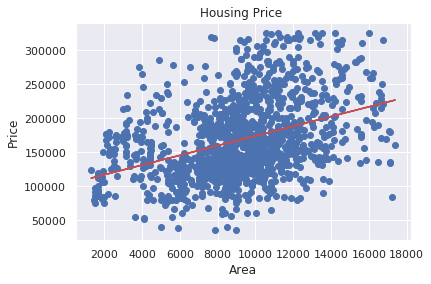

In [41]:
# Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

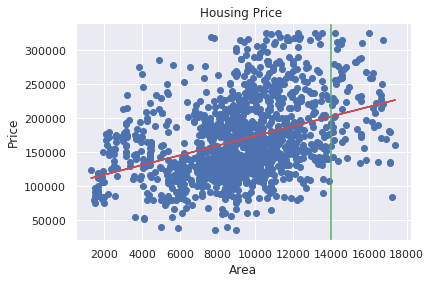

In [42]:
#Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.axvline(x=14000,c='g')

In [3]:
import  warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.random.seed(9)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error